In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from DeepImageSearch import Load_Data, Search_Setup

loc = '/Users/divyamkumar/Desktop/OCT-8/model.keras'
PATH = '/Users/divyamkumar/Desktop/OCT-8/forgit'
PATHog = '/Users/divyamkumar/Desktop/OCT-8/data'
IMG_HEIGHT = 400
IMG_WIDTH = 400

/Users/divyamkumar/anaconda3/envs/forget/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = tf.keras.models.load_model(loc, compile=False)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [3]:
demo_image_generator = ImageDataGenerator(rescale=1./255)
demo_data_gen = demo_image_generator.flow_from_directory(
                    PATH,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=4,
                    classes=['explainingdata'],
                    shuffle=False)

demo_images = [demo_data_gen[i//4][0][i%4] for i in range(8)]
ims = np.array(demo_images)
probs = model.predict(ims).flatten()

Found 8 images belonging to 1 classes.


2024-02-02 10:07:41.122349: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 246ms/step


(8, 400, 400, 1)

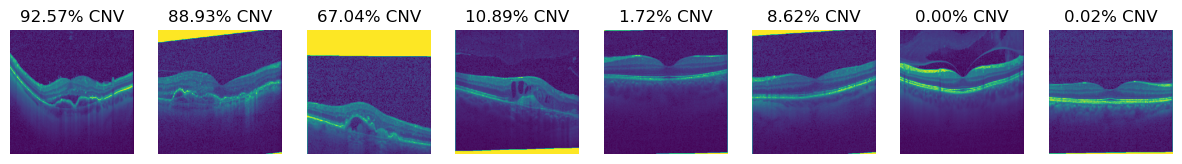

In [6]:
fig, axes = plt.subplots(1, 8, figsize=(15, 15))

for img, probability, ax in zip(demo_images, probs, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("%.2f" % ((1 - probability)*100) + "% CNV")
plt.show()

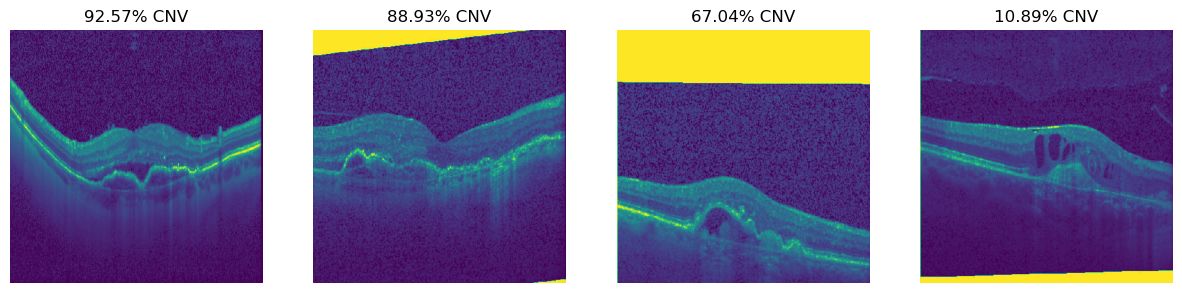

In [8]:
cnv_ims = demo_images[0:4]
fig, axes = plt.subplots(1, 4, figsize=(15, 15))

for img, probability, ax in zip(demo_images, probs, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("%.2f" % ((1 - probability)*100) + "% CNV")
plt.show()

In [5]:
dl = Load_Data()

image_list = dl.from_folder(["/Users/divyamkumar/Desktop/OCT-8/data/train/CNV"])
image_normal_list = dl.from_folder(["/Users/divyamkumar/Desktop/OCT-8/data/train/NORMAL"])

In [9]:
st = Search_Setup(image_list, model_name="vgg19", pretrained=True, image_count=None)
nl = Search_Setup(image_normal_list, model_name="vgg19", pretrained=True, image_count=None)

 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: vgg19
 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: vgg19


In [13]:
st.run_index()

 Metadata and Features are already present, Do you want Extract Again? Enter yes or no
 Meta data already Present, Please Apply Search!
['image_data_features.pkl', 'image_features_vectors.idx']


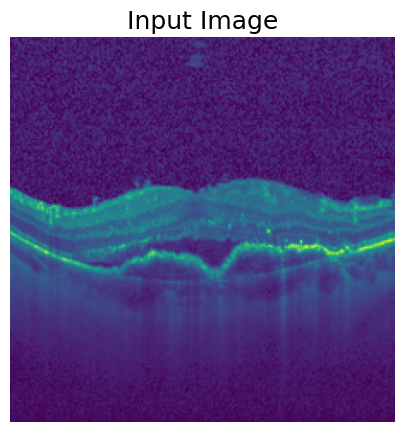

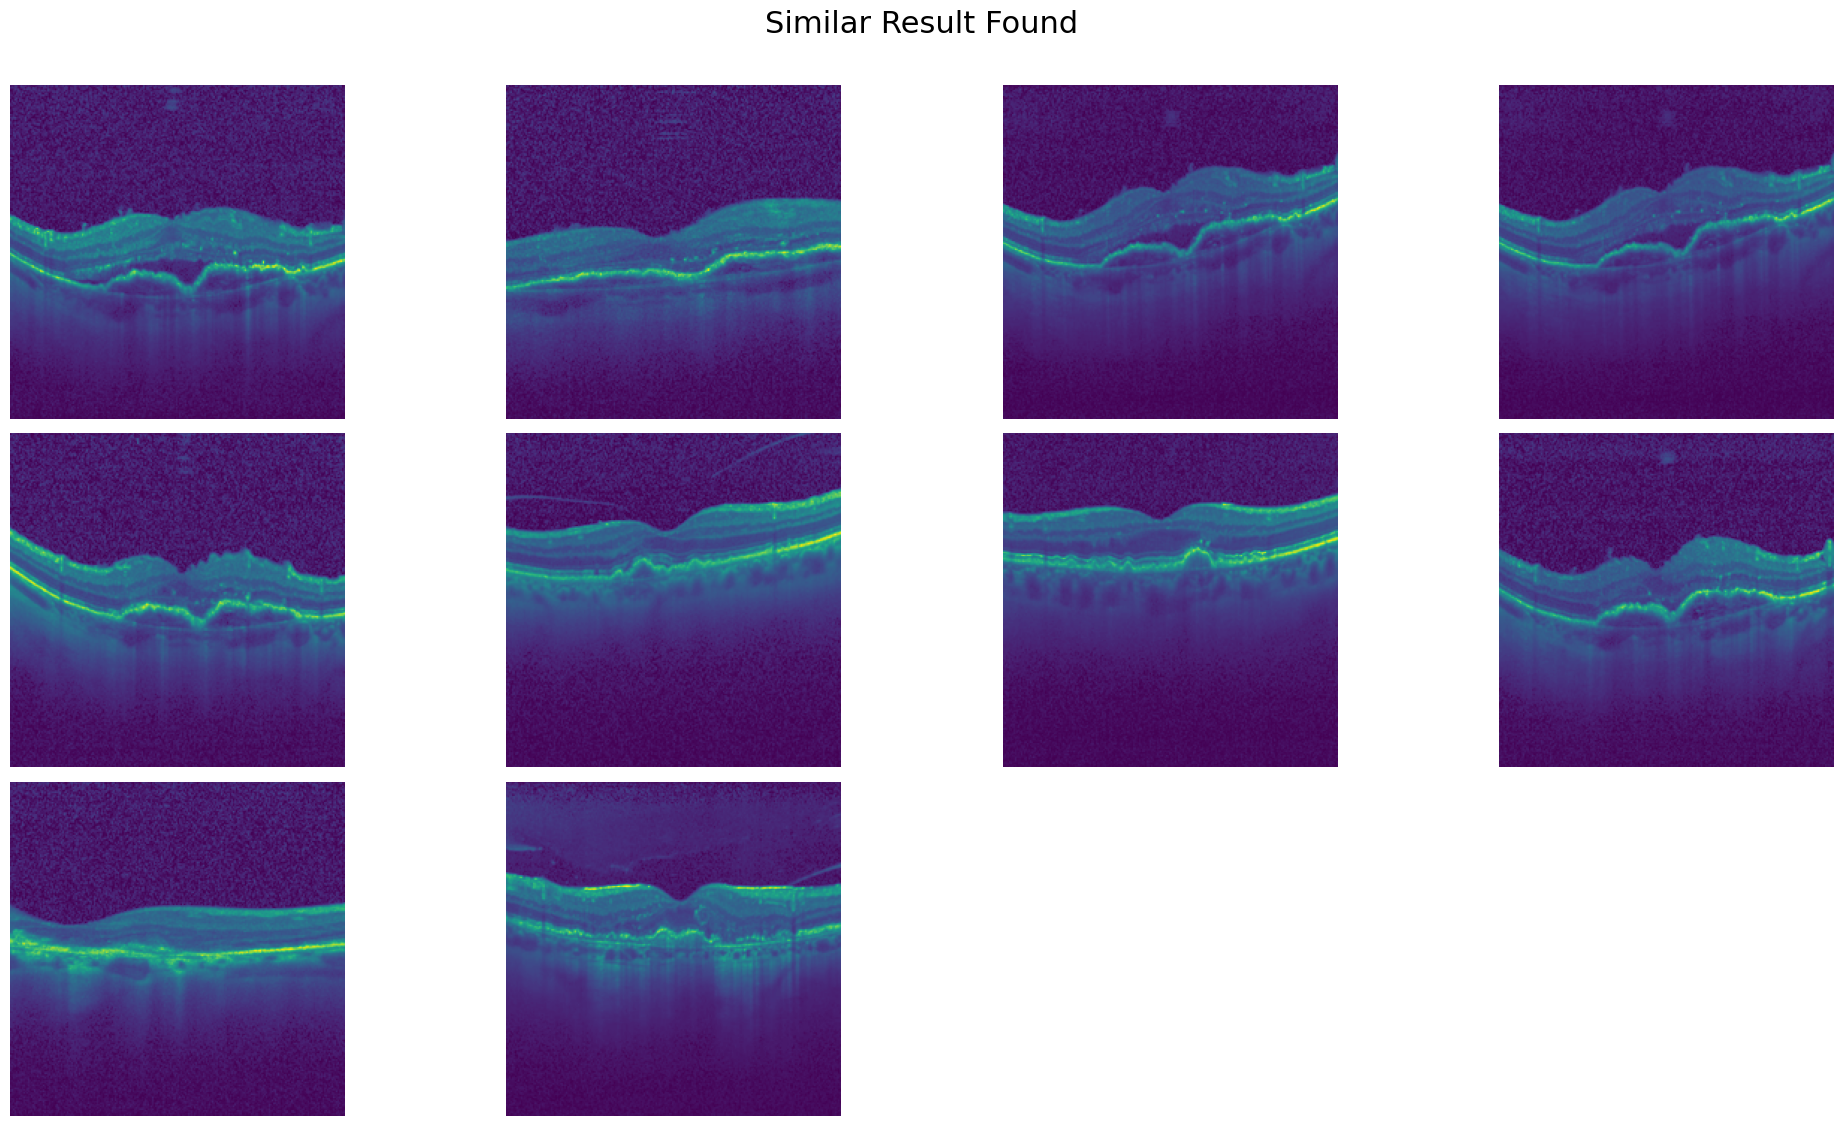

In [12]:
st.plot_similar_images("/Users/divyamkumar/Desktop/OCT-8/forgit/explainingdata/CNV-1130960-1.jpeg", number_of_images=10)

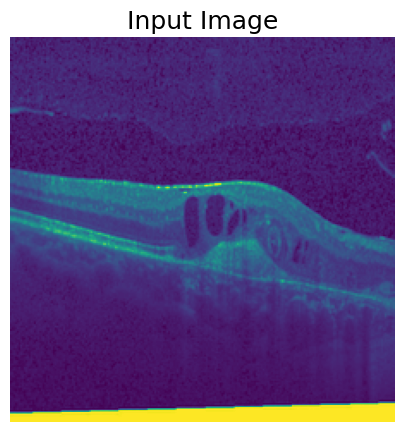

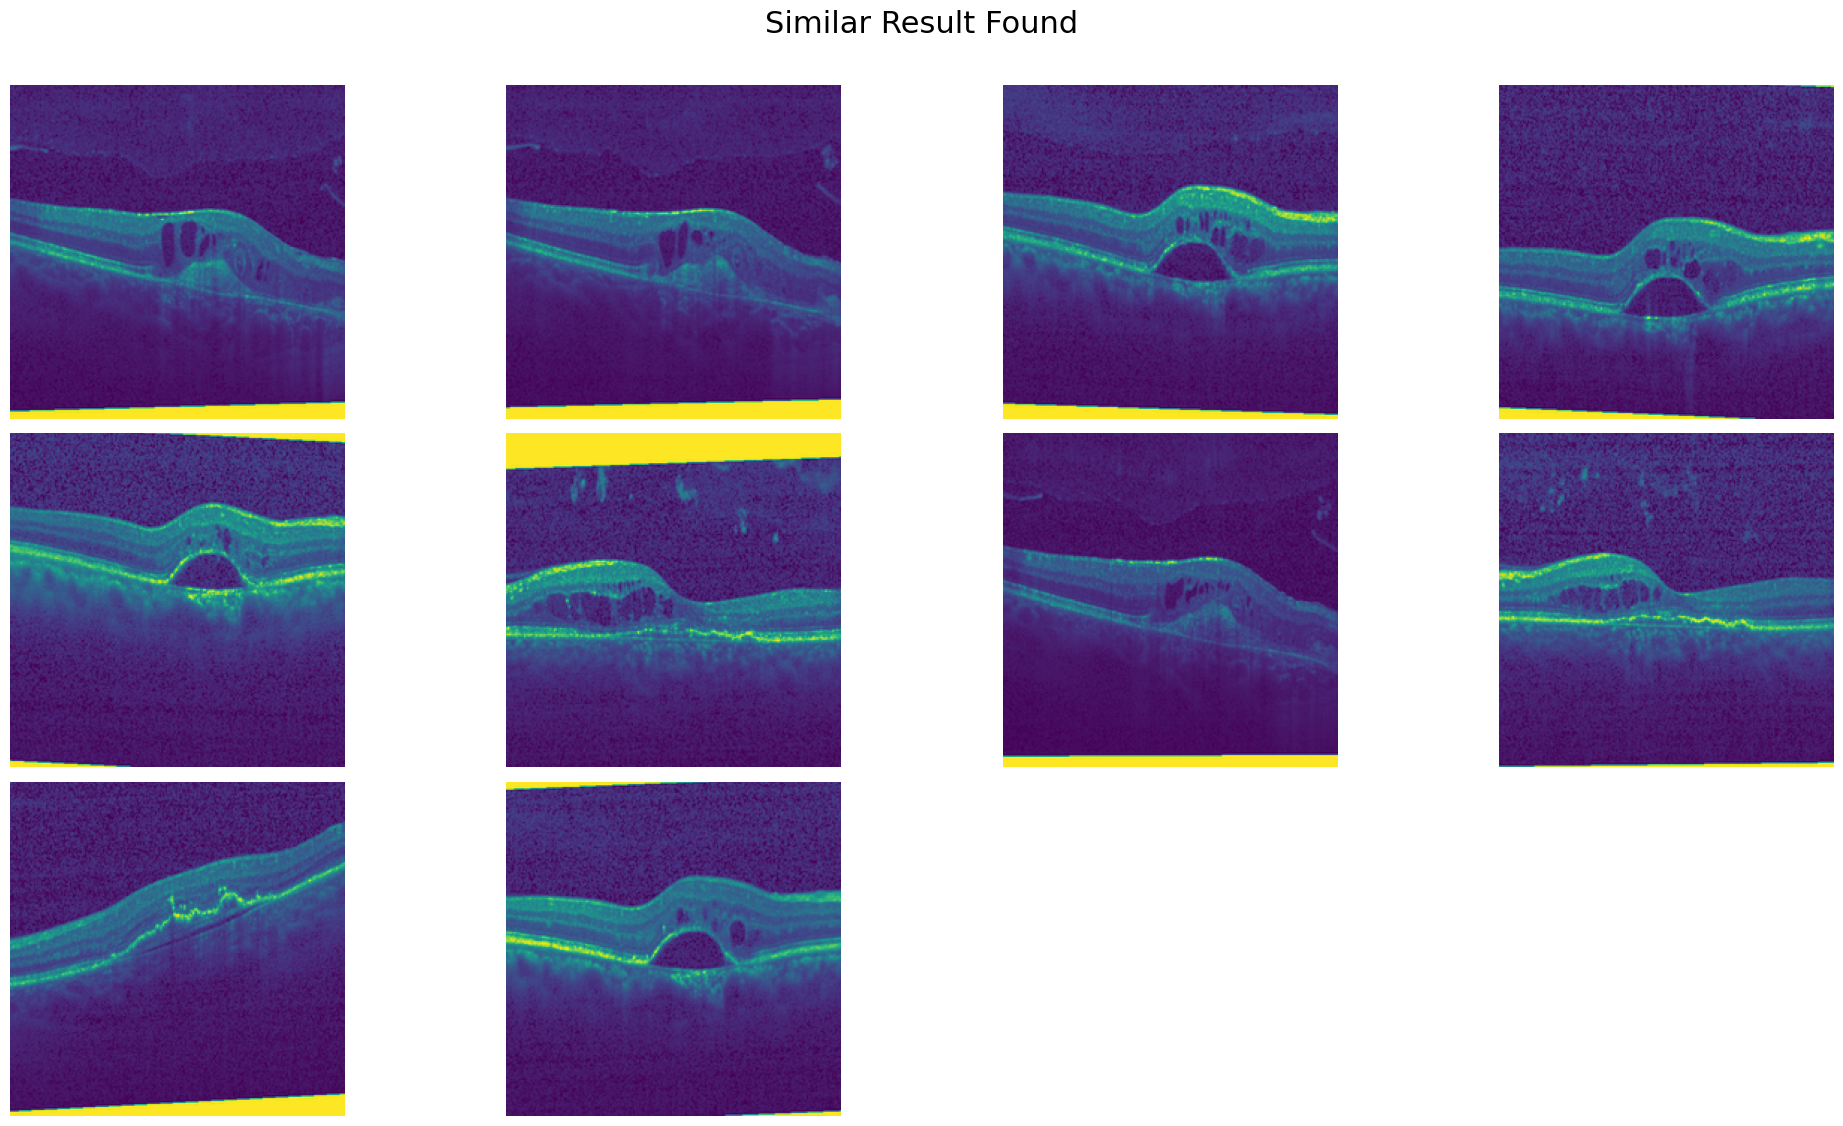

In [14]:
st.plot_similar_images("/Users/divyamkumar/Desktop/OCT-8/forgit/explainingdata/CNV-1177084-1.jpeg", number_of_images=10)